In [12]:
import pandas as pd



pwr = pd.read_csv('./data/Plant_2_Generation_Data.csv')
wtr = pd.read_csv('./data/Plant_2_Weather_Sensor_Data.csv')

wtr['DATE_TIME'] = pd.to_datetime(wtr['DATE_TIME'])
pwr['DATE_TIME'] = pd.to_datetime(pwr['DATE_TIME'])

print(pwr.head())
wtr.head()

   DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15   4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15   4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD  
0  2.429011e+06  
1  1.215279e+09  
2  2.247720e+09  
3  1.704250e+06  
4  1.994153e+07  


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [13]:
df = pd.merge(pwr, wtr[['DATE_TIME','PLANT_ID','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']], on=['DATE_TIME','PLANT_ID'])

In [14]:
df['LOSS'] = df['DC_POWER'] - df['AC_POWER']

In [15]:
df.groupby('SOURCE_KEY')[['DATE_TIME','DAILY_YIELD','IRRADIATION','AC_POWER','DC_POWER']].resample('D', on='DATE_TIME').sum()


DAILY_YIELD  IRRADIATION      AC_POWER  \
SOURCE_KEY      DATE_TIME                                              
4UPUqMRk7TRMgml 2020-05-15  244994.528571    28.559055  16744.078571   
                2020-05-16  293516.438095    23.676573  22791.219048   
                2020-05-17  323713.576190    21.233595  25430.422381   
                2020-05-18  378880.690476    21.495780  30516.029524   
                2020-05-19  130392.439286    20.345321   7878.389048   
...                                   ...          ...           ...   
xoJJ8DcxJEcupym 2020-06-13  425788.400000    20.690174  26840.577619   
                2020-06-14  534758.071429    22.033630  30088.969524   
                2020-06-15  507797.661905    17.765047  25049.489524   
                2020-06-16  427646.757143    15.845917  21870.634286   
                2020-06-17  200072.723810    11.940765  17278.511429   

                                DC_POWER  
SOURCE_KEY      DATE_TIME                 
4UPUqMRk7TRMgml 2020-05-15  17112.654286  
                2020-05-16  23305.452381  
                2020-05-17  25985.950476  
                2020-05-18  31218.581429  
                2020-05-19   8039.996429  
...                                  ...  
xoJJ8DcxJEcupym 2020-06-13  27443.737619  
                2020-06-14  30768.782381  
                2020-06-15  25597.239048  
                2020-06-16  22335.691429  
                2020-06-17  17640.415238  

[748 rows x 4 columns]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#fig, ax = plt.subplots(figsize=(10,10))

#axr = ax.twinx()

daily = df.groupby('SOURCE_KEY').resample('D', on='DATE_TIME').agg({'DAILY_YIELD':'sum','IRRADIATION':'sum', 'AC_POWER':'max','DC_POWER':'max', 'MODULE_TEMPERATURE':['mean','max'], 'LOSS':['median','max']})

#print(daily.head())
#sns.scatterplot(x=daily['IRRADIATION'], y=daily['DAILY_YIELD'], hue=daily.index.droplevel(1), ax=ax, alpha=0.5)

#ax.set_xlim([15,30])
#ax.set_ylim([100000,500000])

#fig= px.scatter(x=daily[('IRRADIATION','sum')], y=daily[('DAILY_YIELD','sum')], color=daily.index.droplevel(1),  opacity=0.5)
fig= px.scatter(x=daily[('IRRADIATION','sum')], y=daily[('LOSS','max')], color=daily.index.droplevel(1).values , opacity=0.5)
#fig= px.scatter(x=daily['IRRADIATION'], y=daily['DAILY_YIELD'], color='MODULE_TEMPERATURE',  opacity=0.5)
#
fig.show()
#plt.tight_layout()

In [41]:
fig= px.scatter(x=daily['AC_POWER'], y=daily['DC_POWER'], color=daily.index.droplevel(1),  opacity=0.5)
#
fig.show()

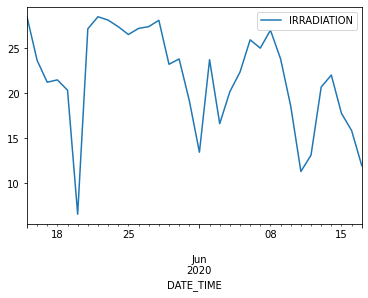

In [27]:
key = daily.iloc[0].name[0]

daily.loc[key].plot(y='IRRADIATION')

In [21]:
wtr.set_index(['DATE_TIME', 'PLANT_ID'], inplace=True)

In [22]:
pd.merge(pwr_piv, wtr, left_on=pwr_piv.index, right_on=wtr.index)

ValueError: MultiIndex has no single backing array. Use 'MultiIndex.to_numpy()' to get a NumPy array of tuples.

In [8]:
daily.head()

DAILY_YIELD IRRADIATION     AC_POWER  \
                                      sum         sum          max   
SOURCE_KEY      DATE_TIME                                            
4UPUqMRk7TRMgml 2020-05-15  244994.528571   28.559055  1229.086667   
                2020-05-16  293516.438095   23.676573  1175.480000   
                2020-05-17  323713.576190   21.233595  1068.486667   
                2020-05-18  378880.690476   21.495780  1234.193333   
                2020-05-19  130392.439286   20.345321   724.793333   

                               DC_POWER MODULE_TEMPERATURE             \
                                    max               mean        max   
SOURCE_KEY      DATE_TIME                                               
4UPUqMRk7TRMgml 2020-05-15  1260.613333          35.559493  60.389377   
                2020-05-16  1205.446667          35.143314  66.016279   
                2020-05-17  1093.400000          34.626731  59.100530   
                2020-05-18  1265.846667          31.618089  50.825745   
                2020-05-19   740.446667          30.740615  53.399307   

                           ACDC_RATIO            
                                 mean       max  
SOURCE_KEY      DATE_TIME                        
4UPUqMRk7TRMgml 2020-05-15   0.181095  0.509029  
                2020-05-16   0.221316  0.508978  
                2020-05-17   0.252925  0.508981  
                2020-05-18   0.247735  0.509022  
                2020-05-19   0.178329  0.509883